# Business Understanding

Make this more tailored to my final answer

Our stakholder is a company looking to purchase an aircraft of the lowest potential risk to use for commerical and private enterprises. I am charged with determining which aircraft is the lowest risk to start this new business endeavor. Stakeholders of this project could use this data in selecting to purchase the aircraft with the lowest risk from aviation accident data from 1962 to 2023. I aim to analzying the safest aircraft to purchase, the safest aircraft make to purchase, and finally the safest aircraft model to purchase. Safety in this dataset can be best measured through number of engines, lowest fatal injuries, lowest serious injuries and lowest minor injuries.

# Data Understanding

Redo

This data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Each aviation accident has a unique event ID associated with it and contains additional information in each row from the type of aircraft, the make, the model, and any safety and injury metrics to account for. This dataset has 31 columns and 90348 rows. The column datatypes contain 5 floats and 26 objects. For relevance for this project I will clean up the data to include columns worth examining to solve my business understanding problem. Some initial limitations in this dataset include missing values, as only the Investigation.Type column contains the full 90348 rows. I will fill these NaN values based off how I see fit. For example, an NaN for an airplane under Number.of.Engines will be replaced with a 1 as airplanes need at least 1 engine and NaN values for injury counts will be filled with 0.0 as this probably means no injuries were reported.

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [248]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [250]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [251]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [252]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Data Preparation

Clean all columns again

I will only be accounting for airline make and models that are in the United States, so I will be removing any rows that are not the United States. Because I am measuring off of total fatal injuries, total serious injuries, total minor injuries, total uninjured, and injury severity, I will remove unnecessary columns. In addition to this, I'll keep some conditions to track safety. These safety conditions to keep in mind are number of engines, engine type, amateur built, weather condition, and flight level.

The reason I am only viewing the United States crashes is because there is low cardinality and low uniform data. Taking into account only US accidents will still give me a chance to analyze majority of the data in our dataframe.

In [253]:
#First I want to examine all columns in the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [254]:
#Creating a dataframe that only shows airplane accidents in the United States
df = df[df['Country'] == 'United States']
df['Country'].value_counts()

United States    82248
Name: Country, dtype: int64

In [255]:
df = df[df['Investigation.Type'] == 'Accident']
df['Investigation.Type'].value_counts()

Accident    79906
Name: Investigation.Type, dtype: int64

In [256]:
df = df[df['Aircraft.Category'] == 'Airplane']
df['Aircraft.Category'].value_counts()

Airplane    23659
Name: Aircraft.Category, dtype: int64

In [257]:
df = df[df['Amateur.Built'] == 'No']
df['Amateur.Built'].value_counts()

No    20564
Name: Amateur.Built, dtype: int64

In [258]:
#I will now remove unwanted columns
cols_to_remove = ['Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Schedule', 'Purpose.of.flight',
                  'Air.carrier', 'Weather.Condition', 'Aircraft.damage','Latitude', 'Longitude', 'Airport.Code',
                  'Airport.Name','Registration.Number', 'FAR.Description', 'Report.Status', 'Publication.Date']
df = df.drop(columns = cols_to_remove)
df.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
5,Accident,United States,Non-Fatal,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,Climb
7,Accident,United States,Non-Fatal,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,Takeoff
8,Accident,United States,Non-Fatal,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,Landing
12,Accident,United States,Non-Fatal,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,Cruise
13,Accident,United States,Fatal(1),Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,Takeoff


In [259]:
# Fill NaN values with 0.0 for total fatal/serious/minor and uninjured injuries
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0.0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0.0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0.0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0.0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20564 entries, 5 to 90345
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      20564 non-null  object 
 1   Country                 20564 non-null  object 
 2   Injury.Severity         20531 non-null  object 
 3   Aircraft.Category       20564 non-null  object 
 4   Make                    20564 non-null  object 
 5   Model                   20560 non-null  object 
 6   Amateur.Built           20564 non-null  object 
 7   Number.of.Engines       20120 non-null  float64
 8   Engine.Type             18975 non-null  object 
 9   Total.Fatal.Injuries    20564 non-null  float64
 10  Total.Serious.Injuries  20564 non-null  float64
 11  Total.Minor.Injuries    20564 non-null  float64
 12  Total.Uninjured         20564 non-null  float64
 13  Broad.phase.of.flight   5610 non-null   object 
dtypes: float64(5), object(9)
memory usage:

# Exploratory Data Analysis

First I plan on selecting the safest aircraft category by the number of engines. The more number of engines an aircraft has, the safer it is in flight. I'll create a bar chart that depicts number of engine per aircraft and fill NaN values as 1.0 because it is impossible for airplanes to fly without having at least 1 engine.

Next I plan to examine the ratio of injury counts for each airplane make. The injury categories I'll measure by are total fatal injuries, total serious injuries, total minor injuries, and total uninjured. Visualizing this ratio will tell me which airplane make has the lowest injurity ratio.

Lastly, I'll pick which model of the airplane's make has the lowest injury ratio. This is how I determine which airplane model is the safest to select.

--

Maybe look into best engine to use: based on number of engines, fatality count

In [245]:
df['Number.of.Engines'].value_counts()

1.0    20478
2.0     2533
4.0       38
3.0       23
0.0        4
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [180]:
#First convert NaN values from Number of Engines to 1
df_us['Number.of.Engines'] = df_us['Number.of.Engines'].fillna(1.0)

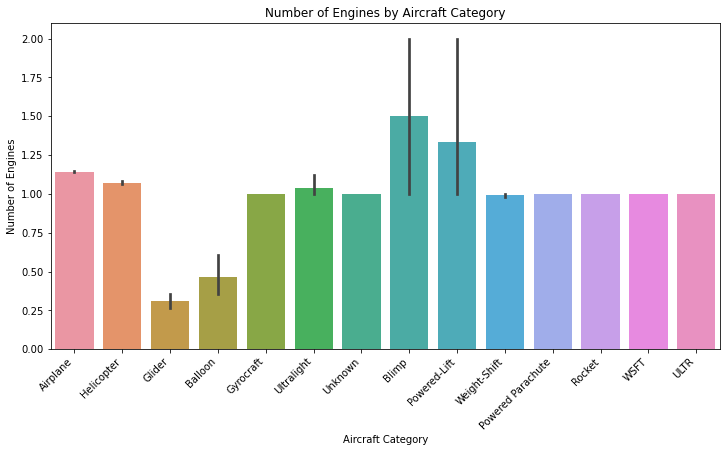

In [181]:
#Plot number of engines per aircraft category
plt.figure(figsize=(12, 6))

sns.barplot(x='Aircraft.Category', y='Number.of.Engines', data=df_us)

plt.title('Number of Engines by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Engines')

plt.xticks(rotation=45, ha='right')

plt.show()

In [182]:
#Showing count of top 3 categories of number of engines per Airplane, Blimp and Powered-Lift.
#Airplanes are a better sample size, so we will select Airplanes.
top3 = ['Airplane', 'Blimp', 'Powered-Lift']

category_counts = df[df['Aircraft.Category'].isin(top3)]['Aircraft.Category'].value_counts()

print(category_counts)

Airplane        27617
Powered-Lift        5
Blimp               4
Name: Aircraft.Category, dtype: int64


In [183]:
#It is clear that Powered-Lifts and Blimps do not have a large enough sample size compared to Airplanes.
#Now lets create a new dataframe to make our ratio calculations easier.
df_airplanes = df_us[df_us['Aircraft.Category'] == 'Airplane']
df_airplanes['Aircraft.Category'].value_counts()

Airplane    78323
Name: Aircraft.Category, dtype: int64

In [184]:
#Get the ratios of total fatal injuries per Make
result_df1 = df_airplanes.groupby('Make')['Total.Fatal.Injuries'].agg(['count', 'sum'])

result_df1['Ratio'] = result_df1['sum'] / result_df1['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10 = result_df1.nlargest(10, 'count')

print(top_10)

         count     sum     Ratio
Make                            
Cessna   21573  6480.0  0.300375
Piper    11661  4863.0  0.417031
CESSNA    4280  1061.0  0.247897
Beech     4167  2631.0  0.631389
PIPER     2507   785.0  0.313123
Bell      1609   534.0  0.331883
Boeing    1161  1322.0  1.138674
Grumman   1076   190.0  0.176580
Mooney    1074   528.0  0.491620
BEECH      892   486.0  0.544843


In [185]:
#Get the ratios of total serious injuries per Make
result_df2 = df_airplanes.groupby('Make')['Total.Serious.Injuries'].agg(['count', 'sum'])

result_df2['Ratio'] = result_df2['sum'] / result_df2['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_2 = result_df2.nlargest(10, 'count')

print(top_10_2)

         count     sum     Ratio
Make                            
Cessna   21573  3322.0  0.153989
Piper    11661  2349.0  0.201441
CESSNA    4280  1155.0  0.269860
Beech     4167   804.0  0.192945
PIPER     2507   607.0  0.242122
Bell      1609   458.0  0.284649
Boeing    1161   487.0  0.419466
Grumman   1076   136.0  0.126394
Mooney    1074   195.0  0.181564
BEECH      892   220.0  0.246637


In [186]:
#Get the ratios of total minor injuries per Make
result_df3 = df_airplanes.groupby('Make')['Total.Minor.Injuries'].agg(['count', 'sum'])

result_df3['Ratio'] = result_df3['sum'] / result_df3['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_3 = result_df3.nlargest(10, 'count')

print(top_10_3)

         count     sum     Ratio
Make                            
Cessna   21573  5842.0  0.270801
Piper    11661  3180.0  0.272704
CESSNA    4280   554.0  0.129439
Beech     4167  1106.0  0.265419
PIPER     2507   405.0  0.161548
Bell      1609   771.0  0.479180
Boeing    1161  1417.0  1.220500
Grumman   1076   241.0  0.223978
Mooney    1074   324.0  0.301676
BEECH      892   178.0  0.199552


In [187]:
#Grumman appears to be the safest Make with the lowest total fatal injury and serious injury count among the top 10 Makes.
#Grumman may not have the lowest minor injury count, but this is not weighed as heavily as fatal and serious injuries.
#Now I'm going to figure out which Grumman Model is the safest.

In [188]:
#Now I'll create a dataframe of just Grumman Makes and look at the injury counts for various Grumman Models
df_grumman = df_airplanes[df_airplanes['Make'] == 'Grumman']
df_grumman['Make'].value_counts()

Grumman    1076
Name: Make, dtype: int64

In [189]:
#Get the ratios of total fatal injuries per Grumman Model
result_df4 = df_grumman.groupby('Model')['Total.Fatal.Injuries'].agg(['count', 'sum'])

result_df4['Ratio'] = result_df4['sum'] / result_df4['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_4 = result_df4.nlargest(10, 'count')

print(top_10_4)

        count   sum     Ratio
Model                        
G-164A    353  17.0  0.048159
G-164B    188  13.0  0.069149
G-164      94   5.0  0.053191
AA-5B      41  11.0  0.268293
AA-5A      38  10.0  0.263158
G164       25   3.0  0.120000
AA-1B      24   7.0  0.291667
AA-5       22   6.0  0.272727
G164B      21   0.0  0.000000
G164A      19   5.0  0.263158


In [190]:
#Get the ratios of total serious injuries per Grumman Model
result_df5 = df_grumman.groupby('Model')['Total.Serious.Injuries'].agg(['count', 'sum'])

result_df5['Ratio'] = result_df5['sum'] / result_df5['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_5 = result_df5.nlargest(10, 'count')

print(top_10_5)

        count   sum     Ratio
Model                        
G-164A    353  28.0  0.079320
G-164B    188  14.0  0.074468
G-164      94  14.0  0.148936
AA-5B      41   5.0  0.121951
AA-5A      38  13.0  0.342105
G164       25   5.0  0.200000
AA-1B      24   4.0  0.166667
AA-5       22   6.0  0.272727
G164B      21   0.0  0.000000
G164A      19   0.0  0.000000


In [191]:
#Get the ratios of total minor injuries per Grumman Model
result_df6 = df_grumman.groupby('Model')['Total.Minor.Injuries'].agg(['count', 'sum'])

result_df6['Ratio'] = result_df6['sum'] / result_df6['count']

#Get the top 10 highest counts, or else there will be too many rows/Makes to select from
top_10_6 = result_df6.nlargest(10, 'count')

print(top_10_6)

        count   sum     Ratio
Model                        
G-164A    353  52.0  0.147309
G-164B    188  21.0  0.111702
G-164      94  15.0  0.159574
AA-5B      41   7.0  0.170732
AA-5A      38  15.0  0.394737
G164       25   3.0  0.120000
AA-1B      24  11.0  0.458333
AA-5       22  10.0  0.454545
G164B      21   2.0  0.095238
G164A      19   2.0  0.105263


In [207]:
df_grumman['Engine.Type'].value_counts()

Reciprocating    1003
Turbo Prop         61
Turbo Jet           6
Turbo Fan           3
Unknown             2
Name: Engine.Type, dtype: int64

In [209]:
df_us['Broad.phase.of.flight'].value_counts()

Landing        15365
Takeoff        12412
Cruise         10073
Maneuvering     8100
Approach        6502
Climb           2006
Taxi            1941
Descent         1862
Go-around       1350
Standing         926
Unknown          505
Other            116
Name: Broad.phase.of.flight, dtype: int64

## Conclusions

This analysis leads to three recommendations for selecting the lowest risk aircraft to purchase.

1) Selecting to purchase an airplane is the lowest risk aircraft category. The airplanes have the highest number of engines on average per aircraft while also keeping mind sample size count. Safety is correlated having a higher number of engines.

2) Of the airplane Makes, the Grumman Make had the lowest risk while keeping in mind a large enough sample size to gather analysis from. The Grumman Make had the lowest fatal and serious injury count ratios of any other airplane Make with a high data count. I weighed having a lower fatal and serious injury ratio greater than minor injuries.

3) Of the Grumman Models, the G-164A model was the lowest risk. This was resulted from looking again at the fatal, serious and minor injury ratios for the top 10 models Grumman produces to analyze from a large enough sample size. I weighed in fatal and serious injuries greater than the minor injury ratio. The G-164A had the lowest ratio in the fatal and serious injury ratios comparative to other Grumman Models.

## Limitations

The first limitation of this study was the criteria in selecting Makes and Models I was analyzing via sample size. I chose to only analyze the Makes and Models based on the top 10 highest counts of each column. I chose this method due to needing a large enough sample size to base my decisions off of. If I were to take into account all Makes and Models in my analysis it would have shown me thousands of rows. I could determine a better method next time in filtering my analysis down.

The second limitation of this study was the missing NaN values. For each NaN value I replaced I based it off of context clues of how I would imagine what an NaN value in the respective column would mean. For example, any NaN value in an injury count column was replaced with 0.0 to indiciate no injuries occurred. I replaced any NaN value in number of engines as 1.0 as airplanes need at least 1 engine to operate. Having no missing values at the start of my data would present me with more accurate findings. 

The last limitation to my study was the columns I was analyzing on. I chose to only analyze US air incidents at the start, it accounted for majoriy of my data, but it does leave out other country incidents in my analysis. I then chose to measure safety by number of engines when there were other categories to explore, such as amateur built, engine type, or weather condition. Then I only looked into the injury counts for fatal, serious and minor to measure the safest airplane Make and Model. Other conditions I could analyze to bring me to my final decision were similar categories in amateur built, engine type, or weather conditions.

## Next Steps

Further analysis could yield additional insights to further improve our selection of the lowest risk aircraft:

1) Better division of injury counts. We have fatal, serious and minor count categories but there can be better division of data to get more specific instances on analyzing each accident's injury count/severity.

2) More data/sample sizes on other aircraft categories to analyze. This data was heavy on the airplane data accidents, it did not give enough additional data to make choices about our other aircraft categories.

3) Including other categories that we can use to measure safety conditions. This modeling could give us a more detailed decision on the aircraft that is the lowest risk to purchase as safety is highly correlated to having a lower risk.